# Generates heatmap plot (paper Figure 7)

In [1]:
import os
import scipy
import numpy as np
import pandas as pd
from scipy.interpolate import griddata

import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from matplotlib.colors import SymLogNorm, Normalize

os.environ['PATH'] += ':/usr/local/texlive/2024/bin/universal-darwin'
plt.rcParams['text.usetex'] = True

In [2]:
def plot_heatmap(points, values, grid_x, grid_y, ax, cmap, norm, method='linear'):
    # Helper function to plot heatmap.
    grid_values = griddata(points, values, (grid_x, grid_y), method=method)  # Can be 'linear', 'nearest', or 'cubic'
    c = ax.contourf(10**grid_x, grid_y, grid_values, levels=1000, cmap=cmap, norm=norm)
    c.set_edgecolor("face")
    ax.set_xscale('log')
    ax.set_yticks([.0, .1, .2, .3, .4])
    ax.yaxis.set_minor_locator(AutoMinorLocator(10))  # 5 subdivisions between major ticks
    ax.tick_params(which='minor', length=2)
    ax.tick_params(which='major', length=4)

In [3]:
# Loading parameter grid results
df_easy = pd.read_csv('ratios_easy.csv')
df_unif = pd.read_csv('ratios_unif.csv')
df_hard = pd.read_csv('ratios_hard.csv')

# Finer grid for interpolation
grid_x, grid_y = np.mgrid[-1:1:50j, .001:.45:50j]
points_easy = df_easy[['log_r', 'sep']].values
points_unif = df_unif[['log_r', 'sep']].values
points_hard = df_hard[['log_r', 'sep']].values

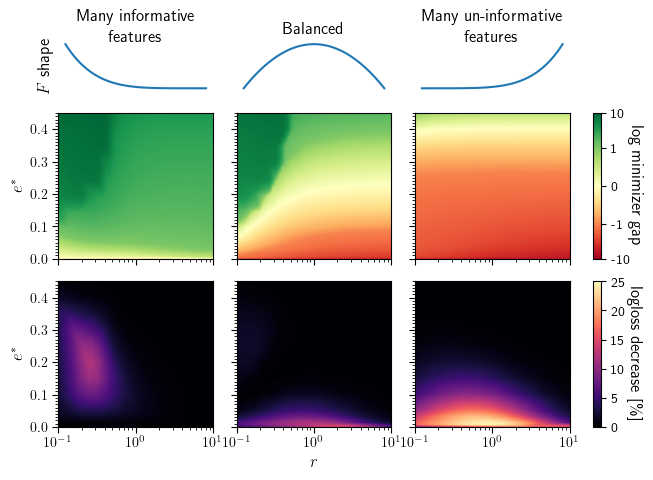

In [ ]:
# Heatmap figure paper

fig, axs = plt.subplots(3,4, height_ratios=[1,3,3], width_ratios=[1,1,1,.05], figsize=(7,5))

fs = 12
x = np.linspace(0,1,100)

axs[0,0].plot(x, np.power(1-x, 5)/scipy.special.beta(1,5))
axs[0,0].set_xticks([])
axs[0,0].set_yticks([])
for spine in axs[0,0].spines.values():
    spine.set_visible(False)
axs[0,0].set_ylabel(r'$F$ shape', fontsize=fs)
axs[0,0].set_title(r'\begin{center} Many informative \\ features \end{center}', fontsize=fs)

axs[0,1].plot(x, np.multiply(x, 1-x)/scipy.special.beta(2,2))
axs[0,1].set_xticks([])
axs[0,1].set_yticks([])
for spine in axs[0,1].spines.values():
    spine.set_visible(False)
axs[0,1].set_title(r'Balanced', fontsize=fs)

axs[0,2].plot(x, np.power(x, 5)/scipy.special.beta(5,1))
axs[0,2].set_xticks([])
axs[0,2].set_yticks([])
for spine in axs[0,2].spines.values():
    spine.set_visible(False)
axs[0,2].set_title(r'\begin{center} Many un-informative \\ features \end{center}', fontsize=fs)

axs[0,3].set_xticks([])
axs[0,3].set_yticks([])
for spine in axs[0,3].spines.values():
    spine.set_visible(False)


values_easy = df_easy['cal_mzr'].values - df_easy['ref_mzr'].values
values_unif = df_unif['cal_mzr'].values - df_unif['ref_mzr'].values
values_hard = df_hard['cal_mzr'].values - df_hard['ref_mzr'].values

vmin = min(np.min(values_easy), np.min(values_unif), np.min(values_hard), -10)
vmax = max(np.max(values_easy), np.max(values_unif), np.max(values_hard), 10)
norm = SymLogNorm(vmin=vmin, vmax=vmax, linthresh=1.)
cmap = 'RdYlGn'

plot_heatmap(points_easy, values_easy, grid_x, grid_y, axs[1,0], cmap, norm)
axs[1,0].set_ylabel(r'$e^*$', fontsize=fs)
axs[1,0].set_xticklabels([])
plot_heatmap(points_unif, values_unif, grid_x, grid_y, axs[1,1], cmap, norm)
axs[1,1].set_xticklabels([])
axs[1,1].set_yticklabels([])
plot_heatmap(points_hard, values_hard, grid_x, grid_y, axs[1,2], cmap, norm)
axs[1,2].set_xticklabels([])
axs[1,2].set_yticklabels([])

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)  # Create a ScalarMappable to define the colorbar
cbar = fig.colorbar(sm, cax=axs[1,3])
cbar_ticklabels = [int(tick) for tick in cbar.get_ticks()]  # Format as 10^tick
cbar.set_ticks(cbar.get_ticks(), labels=cbar_ticklabels)
cbar.set_label(r'log minimizer gap', fontsize=fs, rotation=270, labelpad=10)


column = 'loss_decrease'

vmin = min(df_easy[column].values.min(), df_unif[column].values.min(), df_hard[column].values.min(), 0)
vmax = max(df_easy[column].values.max(), df_unif[column].values.max(), df_hard[column].values.max(), 25)

norm = Normalize(vmin=vmin, vmax=vmax)
cmap = 'magma'

plot_heatmap(points_easy, df_easy[column].values, grid_x, grid_y, axs[2,0], cmap, norm)
axs[2,0].set_ylabel(r'$e^*$', fontsize=fs)
plot_heatmap(points_unif, df_unif[column].values, grid_x, grid_y, axs[2,1], cmap, norm)
axs[2,1].set_xlabel(r'$r$', fontsize=fs)
axs[2,1].set_yticklabels([])
plot_heatmap(points_hard, df_hard[column].values, grid_x, grid_y, axs[2,2], cmap, norm)
axs[2,2].set_yticklabels([])

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)  # Create a ScalarMappable to define the colorbar
cbar = fig.colorbar(sm, cax=axs[2,3])
cbar_ticklabels = [int(tick) for tick in cbar.get_ticks()]
cbar.set_ticks(cbar.get_ticks(), labels=cbar_ticklabels)
cbar.set_label(r'logloss decrease [\%]', fontsize=fs, rotation=270, labelpad=14)

plt.savefig("figures/heatmaps.pdf", bbox_inches = "tight")
plt.show()

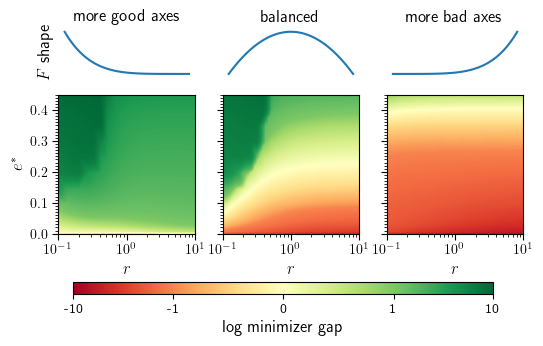

In [ ]:
# Older version

fig, axs = plt.subplots(2,3, height_ratios=[1,3], figsize=(6,3)) #, constrained_layout=True)

fs = 12
x = np.linspace(0,1,100)

axs[0,0].plot(x, np.power(1-x, 5)/scipy.special.beta(1,5))
axs[0,0].set_title('more good axes', fontsize=fs)
axs[0,0].set_xticks([])
axs[0,0].set_yticks([])
for spine in axs[0,0].spines.values():
    spine.set_visible(False)
axs[0,0].set_ylabel(r'$F$ shape', fontsize=fs)

axs[0,1].plot(x, np.multiply(x, 1-x)/scipy.special.beta(2,2))
axs[0,1].set_title('balanced', fontsize=fs)
axs[0,1].set_xticks([])
axs[0,1].set_yticks([])
for spine in axs[0,1].spines.values():
    spine.set_visible(False)

axs[0,2].plot(x, np.power(x, 5)/scipy.special.beta(5,1))
axs[0,2].set_title('more bad axes', fontsize=fs)
axs[0,2].set_xticks([])
axs[0,2].set_yticks([])
for spine in axs[0,2].spines.values():
    spine.set_visible(False)

values_easy = df_easy['cal_mzr'].values - df_easy['ref_mzr'].values
values_unif = df_unif['cal_mzr'].values - df_unif['ref_mzr'].values
values_hard = df_hard['cal_mzr'].values - df_hard['ref_mzr'].values

vmin = min(np.min(values_easy), np.min(values_unif), np.min(values_hard), -10)
vmax = max(np.max(values_easy), np.max(values_unif), np.max(values_hard), 10)
norm = SymLogNorm(vmin=vmin, vmax=vmax, linthresh=1.)
cmap = 'RdYlGn'

plot_heatmap(points_easy, values_easy, grid_x, grid_y, axs[1,0], cmap, norm)
axs[1,0].set_xlabel(r'$r$', fontsize=fs)
axs[1,0].set_ylabel(r'$e^*$', fontsize=fs)
plot_heatmap(points_unif, values_unif, grid_x, grid_y, axs[1,1], cmap, norm)
axs[1,1].set_xlabel(r'$r$', fontsize=fs)
axs[1,1].set_yticklabels([])
plot_heatmap(points_hard, values_hard, grid_x, grid_y, axs[1,2], cmap, norm)
axs[1,2].set_xlabel(r'$r$', fontsize=fs)
axs[1,2].set_yticklabels([])

# Add a single colorbar
fig.subplots_adjust(bottom=0.2)  # Adjust space to fit the colorbar
cbar_ax = fig.add_axes([0.15, 0., 0.7, 0.04])  # [left, bottom, width, height]
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)  # Create a ScalarMappable to define the colorbar
cbar = fig.colorbar(sm, orientation='horizontal', cax=cbar_ax)
cbar_ticklabels = [int(tick) for tick in cbar.get_ticks()]  # Format as 10^tick
cbar.set_ticks(cbar.get_ticks(), labels=cbar_ticklabels)
cbar.set_label(r'log minimizer gap', fontsize=fs) #, rotation=270)
cbar.ax.get_yaxis().labelpad = 10

plt.savefig("figures/test.pdf", bbox_inches = "tight")
plt.show()